# About the Data

This is a dataset about disaster relief tweets provided by Figure 8. The data set contains tweets and a score whether or not the tweet is related to a disaster. This project uses natural language processing to predict whether or not a tweet is related to a disaster.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
import spacy
from spacy import displacy
import re
import numpy as np
import gensim

In [5]:
df = pd.read_csv('socialmedia-disaster-tweets-DFE.csv', encoding='latin-1')

# Preliminary Exploratory Analysis

In [6]:
df.isna().sum()

_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           84
choose_one                   0
choose_one:confidence        0
choose_one_gold          10789
keyword                     87
location                  3638
text                         0
tweetid                      0
userid                      87
dtype: int64

Text(0,0.5,'count')

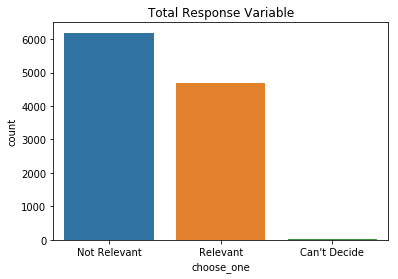

In [7]:
ax = sns.countplot(x='choose_one', data=df, order=['Not Relevant', 'Relevant', "Can't Decide"])
ax.set_title('Total Response Variable')
ax.set_ylabel('count')

/Users/Andrew/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Variation in Confidence')

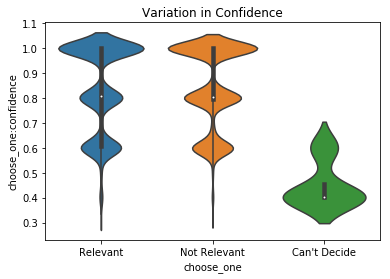

In [8]:
ax = sns.violinplot(x='choose_one', y='choose_one:confidence', data=df)
ax.set_title('Variation in Confidence')

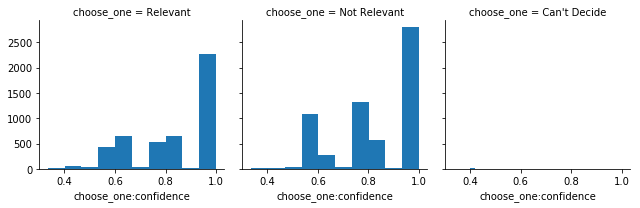

In [9]:
g = sns.FacetGrid(df, col='choose_one')
g.map(plt.hist, 'choose_one:confidence')

In [10]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,choose_one,choose_one:confidence,choose_one_gold,keyword,location,text,tweetid,userid
0,778243823,True,golden,156,NaN,Relevant,1.0000,Relevant,NaN,NaN,Just happened a terrible car crash,1.0,NaN
1,778243824,True,golden,152,NaN,Relevant,1.0000,Relevant,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,13.0,NaN
2,778243825,True,golden,137,NaN,Relevant,1.0000,Relevant,NaN,NaN,"Heard about #earthquake is different cities, s...",14.0,NaN
3,778243826,True,golden,136,NaN,Relevant,0.9603,Relevant,NaN,NaN,"there is a forest fire at spot pond, geese are...",15.0,NaN
4,778243827,True,golden,138,NaN,Relevant,1.0000,Relevant,NaN,NaN,Forest fire near La Ronge Sask. Canada,16.0,NaN


# Spacy
* Explore the data
* Tokenize, remove stop words, lowercase

In [11]:
# Fix stop words issues
nlp = spacy.load('en_core_web_lg')

for word in nlp.Defaults.stop_words:
    nlp.vocab[word].is_stop = True

In [12]:
doc = nlp(u"Apple is a great company. It's the number one in the world")

# text - original word
# pos - simple part of speach
# tag - detailed part of speech
# dep - syntatctic depencency ie relation between tokens
# lemma - base form of word
# shape - shape of the word
# is_alpha - is an alpha char
# is_stop - is a stop word

def words_in_doc(doc):
    print('text', 'partofspeech', 'detailedpartofspeech', 
          'dependency', 'lemma', 'wordshape', 'alphachar', 'stopword',
         'ispunctuation', 'isdigit', 'likenumber', 'likeemail', 'hasvector', 'vectornorm', 'outofvocab')
    for token in doc:
        print(token.text, 
              token.pos_, 
              token.tag_, 
              token.dep_, 
              token.lemma_, 
              token.shape_, 
              token.is_alpha, 
              token.is_stop,
             token.is_punct,
             token.is_digit,
             token.like_num,
             token.like_email, 
              token.has_vector, 
              token.vector_norm, 
              token.is_oov)
        
words_in_doc(doc)

text partofspeech detailedpartofspeech dependency lemma wordshape alphachar stopword ispunctuation isdigit likenumber likeemail hasvector vectornorm outofvocab
Apple PROPN NNP nsubj apple Xxxxx True False False False False False True 7.1346846 False
is VERB VBZ ROOT be xx True True False False False False True 4.890306 False
a DET DT det a x True True False False False False True 5.306696 False
great ADJ JJ amod great xxxx True False False False False False True 5.4395933 False
company NOUN NN attr company xxxx True False False False False False True 6.2875643 False
. PUNCT . punct . . False False True False False False True 4.9316354 False
It PRON PRP nsubj -PRON- Xx True False False False False False True 4.9409766 False
's VERB VBZ ROOT be 'x False False False False False False True 5.1889863 False
the DET DT det the xxx True True False False False False True 4.70935 False
number NOUN NN attr number xxxx True False False False False False True 5.6577897 True
one NUM CD nummod one xx

In [13]:
# render the word dependencies
displacy.render(doc, style='dep', jupyter=True)

In [14]:
# render the entities
displacy.render(doc, style='ent', jupyter=True)

In [15]:
# show entities and categories
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG


In [16]:
# token vector similarity (GLOVE)
for token1 in doc:
    for token2 in doc:
        if token1 != token2:
            print(token1.text, token2.text, token1.similarity(token2))
    


Apple is 0.19535308
Apple a 0.21530442
Apple great 0.2456867
Apple company 0.22240148
Apple . 0.19926026
Apple It 0.33040327
Apple 's 0.1245983
Apple the 0.22822218
Apple number 0.12230293
Apple one 0.26771533
Apple in 0.17057525
Apple the 0.22822218
Apple world 0.21381983
is Apple 0.19535308
is a 0.6350469
is great 0.49623066
is company 0.41421792
is . 0.38110337
is It 0.6935866
is 's 0.4971682
is the 0.5536109
is number 0.3783098
is one 0.6857001
is in 0.4214693
is the 0.5536109
is world 0.47533002
a Apple 0.21530442
a is 0.6350469
a great 0.4711462
a company 0.36854625
a . 0.29160026
a It 0.5669132
a 's 0.42653653
a the 0.59258246
a number 0.35884783
a one 0.70513195
a in 0.4545269
a the 0.59258246
a world 0.33925474
great Apple 0.2456867
great is 0.49623066
great a 0.4711462
great company 0.3390933
great . 0.38003993
great It 0.5980313
great 's 0.40251118
great the 0.51299155
great number 0.30849192
great one 0.6267408
great in 0.39051622
great the 0.51299155
great world 0.47621873

In [17]:
# print token vector
for token in doc:
    print(token.vector)

[-3.6391e-01  4.3771e-01 -2.0447e-01 -2.2889e-01 -1.4227e-01  2.7396e-01
 -1.1435e-02 -1.8578e-01  3.7361e-01  7.5339e-01 -3.0591e-01  2.3741e-02
 -7.7876e-01 -1.3802e-01  6.6992e-02 -6.4303e-02 -4.0024e-01  1.5309e+00
 -1.3897e-02 -1.5657e-01  2.5366e-01  2.1610e-01 -3.2720e-01  3.4974e-01
 -6.4845e-02 -2.9501e-01 -6.3923e-01 -6.2017e-02  2.4559e-01 -6.9334e-02
 -3.9967e-01  3.0925e-02  4.9033e-01  6.7524e-01  1.9481e-01  5.1488e-01
 -3.1149e-01 -7.9939e-02 -6.2096e-01 -5.3277e-03 -1.1264e-01  8.3528e-02
 -7.6947e-03 -1.0788e-01  1.6628e-01  4.2273e-01 -1.9009e-01 -2.9035e-01
  4.5630e-02  1.0120e-01 -4.0855e-01 -3.5000e-01 -3.6175e-01 -4.1396e-01
  5.9485e-01 -1.1524e+00  3.2424e-02  3.4364e-01 -1.9209e-01  4.3255e-02
  4.9227e-02 -5.4258e-01  9.1275e-01  2.9576e-01  2.3658e-02 -6.8737e-01
 -1.9503e-01 -1.1059e-01 -2.2567e-01  2.4180e-01 -3.1230e-01  4.2700e-01
  8.3952e-02  2.2703e-01  3.0581e-01 -1.7276e-01  3.2536e-01  5.4696e-03
 -3.2745e-01  1.9439e-01  2.2616e-01  7.4742e-02  2

[-9.3846e-02  5.8296e-01 -1.9271e-02 -7.0072e-02  1.8095e-01  1.5343e-01
  1.7444e-01 -1.8207e-01 -6.6300e-02  2.3681e+00 -1.2753e-01  1.7784e-02
  1.0581e-01  1.9629e-01 -2.5103e-01 -2.7987e-01 -2.9529e-01  1.1575e+00
 -2.0997e-01  8.3031e-02 -2.6101e-02 -2.3911e-01  2.7443e-01 -2.2339e-01
 -4.9437e-02  1.9215e-01  1.2176e-01  2.2273e-01 -1.2051e-01  1.9972e-01
  2.1834e-01  3.0302e-01 -1.7650e-02  6.6369e-02  1.5469e-01 -2.7746e-01
  2.9550e-01 -3.5517e-01 -3.6803e-01 -2.1441e-01 -1.6825e-02  3.2859e-01
 -1.6417e-01 -4.3756e-02  3.2168e-01  4.7823e-01 -3.0072e-01  3.5865e-01
  1.8450e-01 -1.1995e-01 -4.8905e-02  3.7055e-01  4.4224e-01  1.7276e-01
  1.8705e-01  2.3734e-01  5.5195e-03  1.5334e-01 -8.0614e-02 -9.8517e-04
 -1.3972e-01 -5.1074e-01 -1.0340e-01  4.5437e-01  6.5120e-02 -1.9894e-01
  2.0476e-01  2.5925e-01  1.5235e-01  6.9943e-02  2.5109e-01  1.1591e-01
 -1.1138e-01  1.0800e-01  2.0717e-01 -1.2912e-01 -9.8970e-02 -8.5548e-02
 -3.3701e-01  3.1039e-01  1.4305e-01  4.3963e-01  3

[-6.6796e-03  2.2238e-01  2.7709e-01 -1.6760e-01  3.9934e-01 -2.6935e-01
  1.1758e-01  8.2171e-01 -2.9600e-01  2.7338e+00 -5.1854e-01 -3.9980e-01
  4.5268e-02  7.0994e-02  3.8210e-01 -1.9731e-01 -4.1031e-01  9.1488e-01
 -4.5642e-02  1.9991e-01  3.5154e-02  4.0459e-02  5.2444e-02  1.6124e-01
  1.8280e-01 -1.5186e-01  3.1278e-01 -1.4228e-02 -7.5154e-02  6.3618e-01
 -3.0658e-03  1.1577e-01 -1.5101e-02 -9.5193e-02  4.2313e-01 -3.5243e-01
  1.5452e-01 -3.9491e-01  6.1847e-02  4.5658e-01  1.8395e-01 -3.4329e-02
  8.0296e-02  2.1393e-01 -1.2170e-01  1.2957e-02 -2.3259e-01 -8.4731e-02
  4.4998e-02 -1.4019e-01 -7.0056e-02 -1.2399e-01 -4.5609e-01 -1.0087e-01
  3.9152e-01 -1.9437e-01  3.1484e-01 -2.4423e-01  7.8843e-01 -2.7220e-01
  3.5652e-02  7.1816e-02 -9.9133e-02  1.0260e-02 -1.4698e-01  1.9898e-02
  1.5508e-01 -9.4629e-02 -1.1017e-01  3.4240e-02 -1.9389e-01 -4.3287e-01
  2.9240e-01  2.0294e-01 -4.4540e-01  3.3994e-01  8.8975e-03 -1.5746e-02
  4.4674e-01  4.8578e-01  4.7199e-02  2.3850e-01 -1

In [18]:
# print information about each token vector
for token in doc:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

Apple True 7.1346846 False
is True 4.890306 False
a True 5.306696 False
great True 5.4395933 False
company True 6.2875643 False
. True 4.9316354 False
It True 4.9409766 False
's True 5.1889863 False
the True 4.70935 False
number True 5.6577897 True
one True 4.5981426 False
in True 5.0929856 False
the True 4.70935 False
world True 5.9745507 False


In [19]:
# average vector of the doc
doc.vector

array([ 6.51638350e-03,  2.68231332e-01, -7.45704025e-02, -1.09950438e-01,
        1.88104227e-01, -3.29374708e-02, -5.46164392e-03, -1.27156943e-01,
        1.11471545e-02,  2.34823489e+00, -3.36980343e-01, -2.38587894e-02,
        2.82092728e-02, -7.56649747e-02,  2.65495721e-02, -1.14558287e-01,
       -1.00199066e-01,  1.29484642e+00, -8.56641456e-02, -1.07532576e-01,
       -7.23452792e-02, -6.67515695e-02, -9.75927785e-02,  2.39678789e-02,
        1.10867143e-01, -1.96967870e-02, -8.66485089e-02,  8.75389669e-03,
        2.76316386e-02,  3.78305241e-02,  2.56806817e-02,  1.58099920e-01,
        3.73666249e-02,  1.37508839e-01,  1.61509067e-01, -7.09535414e-03,
        7.63411447e-02, -1.27844466e-02, -6.86815009e-02, -1.56987056e-01,
        6.96634278e-02,  1.90969810e-01,  4.61308658e-02, -1.70471564e-01,
        1.20954290e-01,  5.26399277e-02, -1.63642138e-01, -4.67271544e-02,
        1.49500949e-04,  2.97382902e-02, -6.69025704e-02,  6.61481395e-02,
       -5.09805679e-02,  

In [20]:
# noun chunks
for chunk in doc.noun_chunks:
    print(chunk.text)

Apple
a great company
It
the number
the world


In [21]:
# sentences
for chunk in doc.sents:
    print(chunk)

Apple is a great company.
It's the number one in the world


In [22]:
# find similarity between message and all other messages in the file
from collections import defaultdict

def find_similarity(row, dataframe):
    # find similarity between message and all other messages in the file

    sim_docs = defaultdict(list)

    msg1 = row
    for msg2 in dataframe.index:
        doc1 = nlp(dataframe.loc[msg1, 'text'])
        doc2 = nlp(dataframe.loc[msg2, 'text'])
        if msg1 != msg2:
            sim_docs[msg1].append([doc1.similarity(doc2), msg2])
    
    return sim_docs

sim_docs = find_similarity(0, df)

In [23]:
# show the top most similar messages
sorted_results = sorted(sim_docs[0], key=lambda x: -x[0])

In [24]:
sorted_results[0]

[0.9176464021592283, 241]

In [25]:
# calculate number of similar posts above threshold
num_pos = 0
num_neg = 0
threshold = 0.8

for result in sorted_results:
    row = result[1]
    score = result[0]
    if score > threshold:
        if df.loc[row, 'choose_one'] == 'Relevant':
            num_pos += 1
            print(row)
        else:
            num_neg += 1
            print(row)
            
print(num_pos, num_neg, 100 * num_pos / (num_pos + num_neg + .00001))

241
143
7661
215
2596
140
10718
240
8937
8923
118
10724
5373
4649
259
2645
775
2621
9046
9090
232
2461
4956
4815
2963
9272
10709
4664
5252
2582
10860
8810
9083
9043
9048
9053
9066
122
10699
2598
2493
6871
5961
10278
8787
751
9076
235
9729
4802
6238
10574
10569
10710
6461
3521
7917
242
26
304
305
310
313
338
144
223
2597
1729
139
4953
3172
4240
9061
1122
9019
2536
2280
2579
7058
207
5443
5000
175
4071
6833
6559
275
8909
8820
806
5383
2458
10872
10786
5482
2483
2505
1285
3091
6527
126
5548
2482
7194
9960
2558
5812
2638
6800
6804
6805
6808
6809
6812
6816
6818
6819
6823
6824
6825
6826
6827
6829
6830
6832
6834
6837
6844
6846
6847
119
10796
9793
2477
20
2299
6385
9208
2403
2644
2649
2478
8396
129
6681
2559
1933
2001
6311
7931
6891
5823
6820
10605
8816
2307
5404
5395
1110
9703
1592
3481
258
7733
5396
8790
3543
4782
7934
3023
6799
6807
6813
6822
1549
2996
9858
9692
9624
2572
8761
3055
3528
9355
2399
7082
6977
4038
9957
6312
4879
1862
9684
2637
9075
6851
9749
4971
4462
4289
230
9346
5260
3028
1

# Common Words for Each Class

In [26]:
from collections import Counter

relevant_counts = Counter()
notrelevant_counts = Counter()
undecided_counts = Counter()

for index, row in df.iterrows():
    doc = nlp(row['text'])

    if row['choose_one'] == 'Relevant':
        for token in doc:
            relevant_counts[token.lemma_] += 1
    elif row['choose_one'] == 'Not Relevant':
        for token in doc:
            notrelevant_counts[token.lemma_] += 1
    else:
        for token in doc:
            undecided_counts[token.lemma_] += 1

In [27]:
num_examples = df['choose_one'].value_counts().to_dict()

ratio_words = Counter()
error = 1e-1

for key in set(list(relevant_counts.keys()) + list(notrelevant_counts.keys())):
    # find ratio of relevant to non-relevant counts
    # 
    ratio_words[key] = (num_examples['Not Relevant'] / num_examples['Relevant']) \
    * (relevant_counts[key]) / (notrelevant_counts[key]+error)

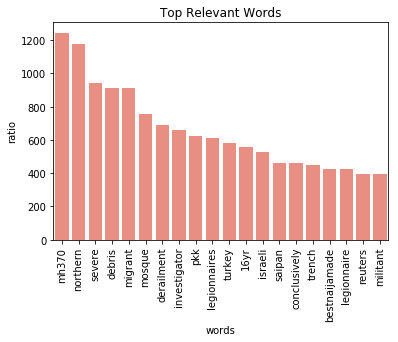

In [28]:
top_words = pd.DataFrame(ratio_words.most_common(20))
top_words.columns = ['words', 'ratio']
plot = sns.barplot(x='words', y='ratio', data=top_words, color='salmon', orient='vertical')
plot.set_xticklabels(list(plot.get_xticklabels()), rotation=90)
plot.set_title('Top Relevant Words')
plt.show()

In [29]:
# relatively neutral words that show up in both relevant and non relevant tweets
[(key, value) for key, value in ratio_words.items() if value < 1.1 and value > .9]

[('help', 0.9332080156791617),
 ('irandeal', 1.0852367805285332),
 ('united', 1.032899120190987),
 ('sky', 0.9847851115870493),
 ('\n\n', 0.9383337152691783),
 ('tax', 0.980732497959119),
 ('industry', 0.980732497959119),
 ('stupid', 1.0384226448978906),
 ('daily', 1.032899120190987),
 ('mountaineering', 0.9687723455449834),
 ('22', 1.0384226448978906),
 ('(', 0.9580523730529399),
 ('burning', 0.9096106755880379),
 ('|', 0.9384378855364585),
 ('spend', 0.9389992001736245),
 ('roof', 1.0384226448978906),
 ('tab\x89û', 0.9687723455449834),
 ('charger', 1.0852367805285332),
 ('cheese', 0.9323865297498666),
 ('plan', 1.0947177882835408),
 ('revolution', 0.9687723455449834),
 ('w', 1.087146288060255),
 ('recognize', 1.0852367805285332),
 ('shake', 0.9323865297498666),
 ('lose', 1.054971212944072),
 ('hijack', 0.9100588700574085),
 ('forgive', 0.9687723455449834),
 ('trash', 0.9687723455449834),
 ('piece', 1.0972283471642075),
 ('lgbt', 0.9687723455449834),
 ('standard', 1.0184529786498542),

# Use Spacy to Tokenize and Lemmatize Messages

In [30]:
# Use spacy to tokenize and lemmatize messages
example_string ='@Calum5SOS this @Who74 http://t.co/QHmXuljSX9 happened on accident but I like it http://t.co/QHmXuljSX9'

In [31]:
# see what the results look like from spacy
doc = nlp(example_string)
words_in_doc(doc)

text partofspeech detailedpartofspeech dependency lemma wordshape alphachar stopword ispunctuation isdigit likenumber likeemail hasvector vectornorm outofvocab
@Calum5SOS VERB VBG ROOT @calum5so @XxxxxdXXX False False False False False False False 0.0 True
this DET DT punct this xxxx True True False False False False True 5.0461264 False
@Who74 NOUN NN compound @who74 @Xxxdd False False False False False False False 0.0 True
http://t.co/QHmXuljSX9 NOUN NN nsubj http://t.co/qhmxuljsx9 xxxx://x.xx/XXxXxxxXXd False False False False False False False 0.0 True
happened VERB VBD ROOT happen xxxx True False False False False False True 5.6249957 False
on ADP IN prep on xx True True False False False False True 5.218119 False
accident NOUN NN pobj accident xxxx True False False False False False True 6.8743396 False
but CCONJ CC cc but xxx True True False False False False True 4.903002 False
I PRON PRP nsubj -PRON- X True False False False False False True 6.4231944 False
like VERB VBP ROOT 

In [32]:
# regex for replacing links and twitter handles
regex_link = re.compile("(?P<url>https?://[^\s]+)")
regex_handle = re.compile('(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)')

def prepare_string(text):
    prepared_text = regex_link.sub('webpage', text)
    prepared_text = regex_handle.sub('username', prepared_text)

    return prepared_text

In [33]:
prepare_string(example_string)

'username this username webpage happened on accident but I like it webpage'

In [34]:
### 
# Steps
# 1. Tokenize
# 2. Lowercase
# 3. Remove Stop Words
# 4. Lemmatize
# 5. Bag of Words/Tfidf
###

# Load model and fix stop words issues
nlp = spacy.load('en_core_web_lg')

for word in nlp.Defaults.stop_words:
    nlp.vocab[word].is_stop = True

In [100]:
# iterate through tweets in the data set to lowercase, tokenize, remove stop words, lemmatize

documents = df['text'].tolist()

tokenize_list = [] # list of tokenized words where each row is a list entry - this will be the main set of features

# then make list of extra features that might be interesting to use including word2vec
pos_list = []
shape_list = []
stop_list = []
punctuation_list = []
digits_list = []
number_like_list = []
email_like_list = []
doc_vector_list = [] # holds average vector for each document (after removing stop words, punctuation)
doc_length_list = [] # number of tokens in each document

# TODO: Turn this into a function for processing new data as it comes in for prediction
for i, document in enumerate(documents):
    prepared_text = []
    pos_counter = Counter() # 
    shape = Counter()
    stop = 0
    punctuation = Counter()
    is_digits = 0
    number_like = 0
    email_like = 0
    doc_vector = []
    
    prepared_doc = prepare_string(document)
    doc = nlp(prepared_doc.lower())
    
    for token in doc:
        if token.is_stop != True and token.is_punct != True and token.text.isspace() != True: # remove punctuation and stop words
            if token.lemma_ != '-PRON-': # keep pronounces although most of these are stop words
                prepared_text.append(token.lemma_)
            else:
                prepared_text.append(token)
                
            doc_vector.append(token.vector) # append the vector fo the token, which will be averaged
                
        # consider other features besides tokenized words
        pos_counter[token.pos_] += 1 # counts of parts of speech
        shape[len(token.shape_)] += 1 # counts of word shapes
        
        if token.is_stop == True: # number of stop words
            stop += 1
        
        if token.is_punct == True:
            punctuation[token.text] += 1 # counts of punctuation
        
        if token.is_digit == True:
            is_digits += 1
            
        if token.like_num == True:
            number_like += 1
        
        if token.like_email == True:
            email_like += 1
        
    tokenize_list.append(prepared_text)
    pos_list.append(pos_counter)
    shape_list.append(shape)
    stop_list.append(stop)
    punctuation_list.append(punctuation)
    digits_list.append(is_digits)
    number_like_list.append(number_like)
    email_like_list.append(email_like)
    
    if len(doc_vector) > 0:
        doc_vector_list.append(np.mean(doc_vector, axis=0))
    else:
        doc_vector_list.append(np.array([0]*300)) # for a tweet with no word embedding vector
        
    doc_length_list.append(len(doc))

In [101]:
# check for indices that had no words after removing stop words
for i, doc in enumerate(doc_vector_list):
    if doc.size < 300:
        print(i, doc)

In [102]:
# check that all rows in the dataframe made it through the pipeline
print(len(pos_list)) # list of dictionaries with part of speech counts
print(len(shape_list)) # list of dictionaries with shape list
print(len(stop_list)) # list of dictionaries with stop words counts
print(len(punctuation_list)) # list of dictionaries with count of punctuation
print(len(digits_list)) # list of dictionaries with count of digit lengths
print(len(number_like_list)) # count of number like tokens
print(len(email_like_list)) # count of email like tokens
print(len(doc_vector_list)) # holds average vector for each document (after removing stop words, punctuation)
print(len(doc_length_list)) # number of tokens in each document
print(len(tokenize_list)) #
print(len(df)) # original data frame

10876
10876
10876
10876
10876
10876
10876
10876
10876
10876
10876


# Use Gensim for Tfidf

* remove words that only appear once in the entire corpus
* create tfidf features

In [103]:
frequencies = Counter()

for line in tokenize_list: # count number of times words appear
    for token in line:
        frequencies[token] += 1

print(len(frequencies)) # number of words in the corpus

16556


In [104]:
# remove words that have frequency of less than 1
texts = [[token for token in line if frequencies[token] > 1] for line in tokenize_list]

In [105]:
# TODO: this is where train-test split needs to come into play - corpora should only come from train
from gensim import corpora
dictionary = corpora.Dictionary(texts)
print(dictionary)

Dictionary(6791 unique tokens: ['car', 'crash', 'happen', 'terrible', 'allah']...)


In [106]:
bow = [dictionary.doc2bow(text) for text in texts]

In [107]:
# numpy array for bag of words representations
np_bow = gensim.matutils.corpus2dense(bow, num_terms = len(dictionary)) # note that documents are columns 

In [108]:
print(sum(np_bow[:,0]))

4.0


In [109]:
# tfidf transformation
from gensim import models, similarities
tfidf = models.TfidfModel(bow, normalize=True) # train tfidf
tfidf_features = tfidf[bow] # convert bag of word features to tfidf

# Use LSA and LDA for topic modeling

* these could be added as extra features

In [110]:
# Latent Semantic Indexing LSI
lsi =  models.LsiModel(tfidf_features, id2word=dictionary, num_topics=50)
corpus_lsi = lsi[tfidf_features]

In [111]:
lsi.print_topics(50)

[(0,
  '0.783*"username" + 0.282*"be" + 0.173*"not" + 0.137*"webpage" + 0.134*"like" + 0.121*"scream" + 0.085*"fire" + 0.078*"go" + 0.074*"get" + 0.068*"amp"'),
 (1,
  '-0.531*"username" + 0.342*"be" + 0.277*"webpage" + 0.197*"fire" + 0.130*"california" + 0.120*"home" + 0.116*"\'s" + 0.116*"go" + 0.112*"not" + 0.112*"like"'),
 (2,
  '-0.624*"be" + 0.237*"webpage" + -0.207*"not" + 0.184*"username" + 0.154*"california" + 0.141*"wildfire" + 0.138*"northern" + 0.128*"home" + 0.123*"raze" + 0.122*"news"'),
 (3,
  '-0.304*"family" + -0.288*"mh370" + -0.249*"malaysia" + 0.248*"california" + -0.247*"confirm" + 0.224*"wildfire" + -0.224*"wreckage" + 0.223*"northern" + -0.213*"conclusively" + 0.207*"home"'),
 (4,
  '0.309*"suicide" + 0.251*"bomber" + 0.245*"bomb" + -0.193*"mh370" + -0.192*"family" + -0.169*"malaysia" + 0.169*"detonate" + 0.165*"army" + 0.162*"pkk" + -0.160*"confirm"'),
 (5,
  '-0.409*"sandstorm" + -0.388*"watch" + -0.380*"swallow" + -0.379*"airport" + -0.378*"minute" + 0.152*"be

In [112]:
# Latent Dirichlet Allocation LDA
lda = models.LdaModel(tfidf_features, id2word=dictionary, num_topics=2)
lda.print_topics(10)

[(0,
  '0.008*"webpage" + 0.006*"wreck" + 0.006*"username" + 0.005*"be" + 0.004*"mh370" + 0.004*"wreckage" + 0.004*"confirm" + 0.004*"pm" + 0.004*"weapon" + 0.004*"wildfire"'),
 (1,
  '0.014*"username" + 0.007*"webpage" + 0.005*"be" + 0.005*"wild" + 0.005*"wound" + 0.005*"wreck" + 0.005*"like" + 0.004*"weapon" + 0.004*"fire" + 0.004*"not"')]

In [113]:
# show topic features for first row in dataset
lda[tfidf_features][0]

[(0, 0.50039893), (1, 0.49960107)]

In [114]:
# LSI similirities
from gensim import similarities
index_sim = similarities.MatrixSimilarity(corpus_lsi)

compare_with = 200 # row in dataframe to compare with
sims = index_sim[corpus_lsi[compare_with]]

sims = sorted(enumerate(sims), key=lambda item: -item[1])
for sim in sims[0:10]:
    print(df.loc[sim[0], 'text']) #show the original tweet
    print(tokenize_list[sim[0]]) # show the tokenized tweet
    print(punctuation_list[sim[0]]['#']) # show how many hashtags in the tweet

When carelessness leads to an aviation accident the victim has the right to seek compensation for damages. http://t.co/eqAG6rz1vO
['carelessness', 'lead', 'aviation', 'accident', 'victim', 'right', 'seek', 'compensation', 'damage', 'webpage']
0
Accident on I-24 W #NashvilleTraffic. Traffic moving 8m slower than usual. https://t.co/0GHk693EgJ
['accident', 'i-24', 'w', 'nashvilletraffic', 'traffic', 'move', '8', 'm', 'slow', 'usual', 'webpage']
1
On the #M42 northbound between junctions J3 and J3A there are currently delays of 10 mins due to an accident c... http://t.co/LwI3prBa31
['m42', 'northbound', 'junction', 'j3', 'j3a', 'currently', 'delay', '10', 'min', 'accident', 'c', 'webpage']
1
#stlouis #caraccidentlawyer Speeding Among Top Causes of Teen Accidents https://t.co/k4zoMOF319 https://t.co/S2kXVM0cBA Car Accident teeÛ_
['stlouis', 'caraccidentlawyer', 'speeding', 'cause', 'teen', 'accident', 'webpage', 'webpage', 'car', 'accident', 'tee\x89û']
2
Accident cleared in #PaTurnpike o

# Scikit-learn model


In [115]:
# can also use a sparse matrix if features won't fit in memory
np_tfidf = gensim.matutils.corpus2dense(tfidf_features, num_terms = len(dictionary))
np_tfidf.T.shape

(10876, 6791)

In [116]:
from sklearn.preprocessing import MinMaxScaler

In [117]:
# features to use
# tfidf features np_tfidf.T
# number of hashtags punctuation_list
# word embeddings doc_vector_list

hashtag_count = []
for i, row in enumerate(punctuation_list):
    hashtag_count.append([row['#']])

scaler = MinMaxScaler()
hashtag_count = scaler.fit_transform(hashtag_count)

In [124]:
# append extra features to end of columns
# np.asarray(doc_vector_list, dtype=np.float32)
features = np.hstack((np_tfidf.T, hashtag_count, doc_vector_list))

In [126]:
features.shape

(10876, 7092)

In [128]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB().fit(features, df['choose_one'])

In [130]:
from sklearn import metrics
print(metrics.classification_report(df['choose_one'], clf.predict(features)))

              precision    recall  f1-score   support

Can't Decide       0.24      1.00      0.38        16
Not Relevant       0.98      0.62      0.76      6187
    Relevant       0.67      0.98      0.79      4673

   micro avg       0.78      0.78      0.78     10876
   macro avg       0.63      0.87      0.64     10876
weighted avg       0.84      0.78      0.77     10876



In [131]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='hinge', penalty='l2',
              alpha=1e-3, random_state=42, max_iter=10, tol=None)
sgd.fit(features, df['choose_one'])

SGDClassifier(alpha=0.001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=10,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [132]:
print(metrics.classification_report(df['choose_one'], sgd.predict(features)))

              precision    recall  f1-score   support

Can't Decide       0.00      0.00      0.00        16
Not Relevant       0.82      0.91      0.86      6187
    Relevant       0.86      0.73      0.79      4673

   micro avg       0.83      0.83      0.83     10876
   macro avg       0.56      0.55      0.55     10876
weighted avg       0.83      0.83      0.83     10876



/Users/Andrew/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Andrew/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Andrew/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [135]:
from sklearn.ensemble import RandomForestClassifier

In [158]:
clf = RandomForestClassifier()
clf.fit(features, df['choose_one'])
print(metrics.classification_report(df['choose_one'], rf.predict(features)))

/Users/Andrew/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

Can't Decide       0.93      0.88      0.90        16
Not Relevant       0.97      0.99      0.98      6187
    Relevant       0.99      0.95      0.97      4673

   micro avg       0.97      0.97      0.97     10876
   macro avg       0.96      0.94      0.95     10876
weighted avg       0.98      0.97      0.97     10876



In [142]:
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [213]:
clf = RandomForestClassifier(n_estimators=10)

def custom_score(y_true, y_pred): 
    tp = 0
    fn = 0
    
    y_true = list(y_true)
    y_pred = list(y_pred)
    for i, value in enumerate(y_true):

        if y_true[i] == y_pred[i] and y_true[i] == 'Relevant':
            tp += 1
        if y_true[i] == 'Relevant' and y_pred[i] != 'Relevant':
            fn += 1
    score = tp/(tp + fn + 1e-3)
    return score
    
scoring = make_scorer(custom_score)
params = {'max_depth':[9, None], 'min_samples_leaf':[1]}
clf = GridSearchCV(clf, scoring=scoring, param_grid=params, cv=3)
clf.fit(features, df['choose_one'])

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [9, None], 'min_samples_leaf': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(custom_score), verbose=0)

In [214]:
print(metrics.classification_report(df['choose_one'], clf.predict(features)))

              precision    recall  f1-score   support

Can't Decide       0.00      0.00      0.00        16
Not Relevant       0.81      0.94      0.87      6187
    Relevant       0.89      0.71      0.79      4673

   micro avg       0.84      0.84      0.84     10876
   macro avg       0.57      0.55      0.55     10876
weighted avg       0.85      0.84      0.84     10876



/Users/Andrew/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Andrew/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Andrew/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [215]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [216]:
clf.best_params_

{'max_depth': 9, 'min_samples_leaf': 1}

In [217]:
clf.cv_results_

/Users/Andrew/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/Andrew/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/Andrew/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/Andrew/anaconda3/lib/

{'mean_fit_time': array([1.6411403 , 2.03445204]),
 'std_fit_time': array([0.19019319, 0.03080765]),
 'mean_score_time': array([0.09684006, 0.08259106]),
 'std_score_time': array([0.0304269 , 0.00592406]),
 'param_max_depth': masked_array(data=[9, None],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[1, 1],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 9, 'min_samples_leaf': 1},
  {'max_depth': None, 'min_samples_leaf': 1}],
 'split0_test_score': array([0.5256736 , 0.50256707]),
 'split1_test_score': array([0.53851057, 0.48395348]),
 'split2_test_score': array([0.66152816, 0.61014733]),
 'mean_test_score': array([0.57522039, 0.53221001]),
 'std_test_score': array([0.06123667, 0.05561648]),
 'rank_test_score': array([1, 2], dtype=int32),
 'split0_train_score': array([0.75987135, 0.95730306]),
 'split1_train_score': array([0.77752784, 0.